In [225]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn
from scipy.ndimage import laplace

import matplotlib.tri as tri

import os
import seaborn as sns
import importlib

In [226]:
import display_results

In [227]:
def set_sns():
    sns.set_theme()
    sns.set_style("darkgrid")
    sns.set(
        rc={
            "axes.axisbelow": True,
            "axes.edgecolor": "black",
            "axes.facecolor": "white",
            "axes.grid": False,
            "axes.labelcolor": "black",
            "axes.spines.right": False,
            "axes.spines.top": False,
            "figure.facecolor": "white",
            "lines.solid_capstyle": "round",
            "patch.edgecolor": "w",
            "patch.force_edgecolor": True,
            "text.color": "black",
            "xtick.bottom": False,
            "xtick.color": "black",
            "xtick.direction": "out",
            "xtick.top": False,
            "ytick.color": "black",
            "ytick.direction": "out",
            "ytick.left": False,
            "ytick.right": False,
            "legend.facecolor": "white",
            "grid.color": "black",
            "grid.linestyle": "--"
        },
    )

# Plots models

In [228]:
# Plot boundary

# i_list = ['0', '1', '2', '3', '4']
# type_list = ['linear', 'linear_gls', 'bubble', 'p1-iso-p2']
# delta_list = [None, 0.01, 0.1, 0.5, 1, 10]
# c_list = [1, 10, 100]

In [254]:
# Previous dir
os.chdir('..')

In [255]:
os.chdir('./fem2d_stokesPDE')

In [344]:
def load_case(i, tipo, delta, c):
    # Read data
    coord = np.array(pd.read_csv(f'./Models/coord_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
    triang_velocity = np.array(pd.read_csv(f'./Models/triangv_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
    triang_pressure = np.array(pd.read_csv(f'./Models/triangp_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))[:, :3]
    uh = np.array(pd.read_csv(f'./Models/v_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
    p =  np.array(pd.read_csv(f'./Models/p_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
    u_1_true = np.array(pd.read_csv(f'./Models/v1sol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
    u_2_true = np.array(pd.read_csv(f'./Models/v2sol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
    p_true = np.array(pd.read_csv(f'./Models/psol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))

    lines_A = np.max(np.array(triang_velocity.astype(int)))
    lines_B = np.max(np.array(triang_pressure.astype(int)))
    return coord, triang_velocity, triang_pressure, uh, p, u_1_true, u_2_true, p_true, lines_A, lines_B

In [313]:
# load
i = '4'
tipo = 'linear'
delta = 'None'
c = 1
(coord, triang_velocity, triang_pressure, 
 uh, p, u_1_true, u_2_true, 
 p_true, lines_A, lines_B) = load_case(i = i, tipo = tipo, delta = delta, c = c)

## Plot geometry and boundary

In [278]:
# Plot all meshes
fig, axs = plt.subplots(3, 2, figsize = [20, 30])

coord, triang_velocity, *_ = load_case(i = '0', tipo = 'linear', delta = 'None', c = 1)
display_results.plot_geometry(coord, 
                              triang_velocity,
                              figsize = None,
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              show_vertices = False,
                              color_elements = 'k',
                              linewidth_elements = 0.5,
                              ax = axs[0][0])

coord, triang_velocity, *_ = load_case(i = '1', tipo = 'linear', delta = 'None', c = 1)
display_results.plot_geometry(coord, 
                              triang_velocity,
                              figsize = None,
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              show_vertices = False,
                              color_elements = 'k',
                              linewidth_elements = 0.5,
                              ax = axs[0][1])

coord, triang_velocity, *_ = load_case(i = '2', tipo = 'linear', delta = 'None', c = 1)
display_results.plot_geometry(coord, 
                              triang_velocity,
                              figsize = None,
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              show_vertices = False,
                              color_elements = 'k',
                              linewidth_elements = 0.5,
                              ax = axs[1][0])

coord, triang_velocity, *_ = load_case(i = '3', tipo = 'linear', delta = 'None', c = 1)
display_results.plot_geometry(coord, 
                              triang_velocity,
                              figsize = None,
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              show_vertices = False,
                              color_elements = 'k',
                              linewidth_elements = 0.5,
                              ax = axs[1][1])

coord, triang_velocity, *_ = load_case(i = '4', tipo = 'linear', delta = 'None', c = 1)
display_results.plot_geometry(coord, 
                              triang_velocity,
                              figsize = None,
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              show_vertices = False,
                              color_elements = 'k',
                              linewidth_elements = 0.5,
                              ax = axs[2][0])

axs[2][1].set_visible(False)

axs[0][0].text(0.5, -0.1, "A. Mesh 0", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[0][0].transAxes,
              weight = 'bold',
              fontsize = 15)

axs[0][1].text(0.5, -0.1, "B. Mesh 1", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[0][1].transAxes,
              weight = 'bold',
              fontsize = 15)

axs[1][0].text(0.5, -0.1, "C. Mesh 2", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[1][0].transAxes,
              weight = 'bold',
              fontsize = 15)

axs[1][1].text(0.5, -0.1, "D. Mesh 3", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[1][1].transAxes,
              weight = 'bold',
              fontsize = 15)

axs[2][0].text(0.5, -0.1, "E. Mesh 4", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[2][0].transAxes,
              weight = 'bold',
              fontsize = 15)

display_results.save_fig(f'meshes')

In [308]:
# Plot pressure and velocity mesh
(coord, triang_velocity, triang_pressure, 
 uh, p, u_1_true, u_2_true, 
 p_true, lines_A, lines_B) = load_case(i = '3', tipo = 'p1-iso-p2', delta = 'None', c = 1)

fig = plt.figure(figsize = [20, 20])
ax = fig.gca()
    
display_results.plot_geometry(coord, 
                              triang_pressure,
                              figsize = [20, 20],
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              show_vertices = False,
                              color_elements = '#eb3434',
                              linewidth_elements = 0.6,
                              ax = ax)

display_results.plot_geometry(coord, 
                              triang_velocity, 
                              figsize = [20, 20],
                              show_vertices = False,
                              color_elements = '#3458eb',
                              linewidth_elements = 0.4,
                              save_name = f"fig_geo_{i}{type}{delta}{c}",
                              ax = ax)


display_results.save_fig(f'mesh_p1_iso_p2')

# Plot results 2D

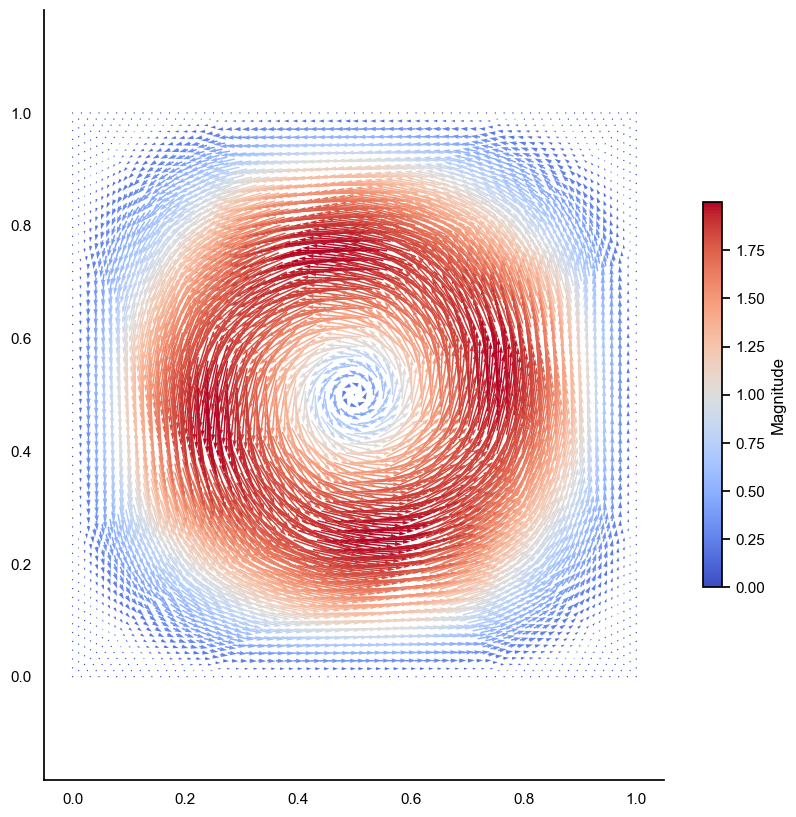

In [233]:
set_sns()
plt.figure(figsize = (10, 10))

magnitude = np.sqrt(u_1_true**2 + u_2_true**2)

# quiver plot
Q = plt.quiver(coord[:, 0], coord[:, 1], 
               u_1_true, 
               u_2_true,
               magnitude, 
               cmap = 'coolwarm', 
               scale = 20)

# Add colorbar
plt.colorbar(Q, label='Magnitude', shrink=0.5)

# x and y limit
plt.xlim(0, 1)
plt.ylim(0, 1)

# Display the plot
plt.axis('equal')

display_results.save_fig(f'true_solution_velocities')

In [234]:
# True solution
set_sns()
save_name = f"true_sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_1_true[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_2_true[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p_true[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

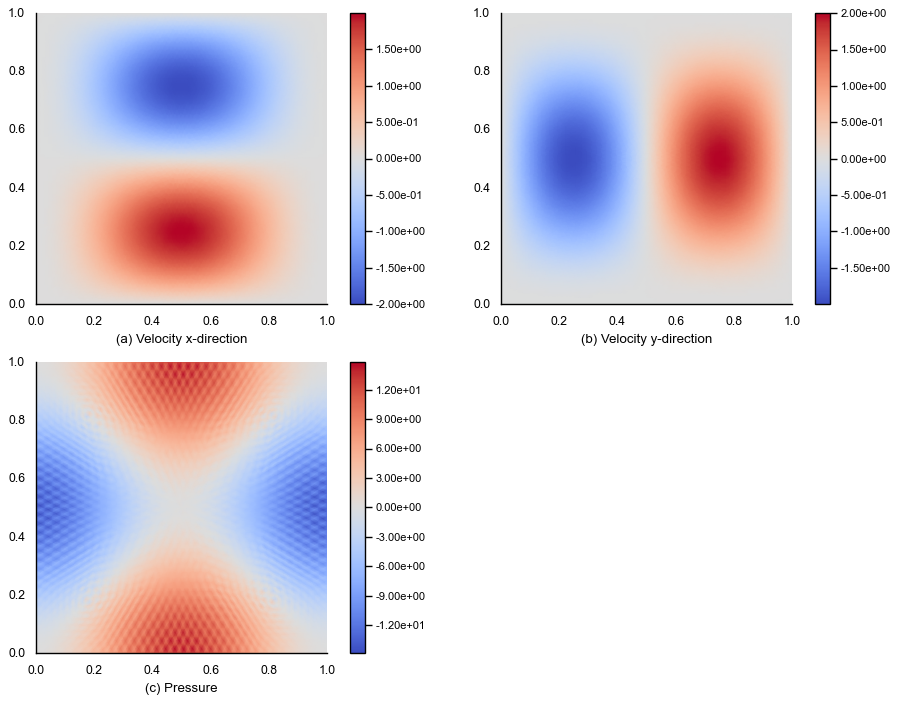

In [315]:
# True solution
set_sns()
save_name = f"sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

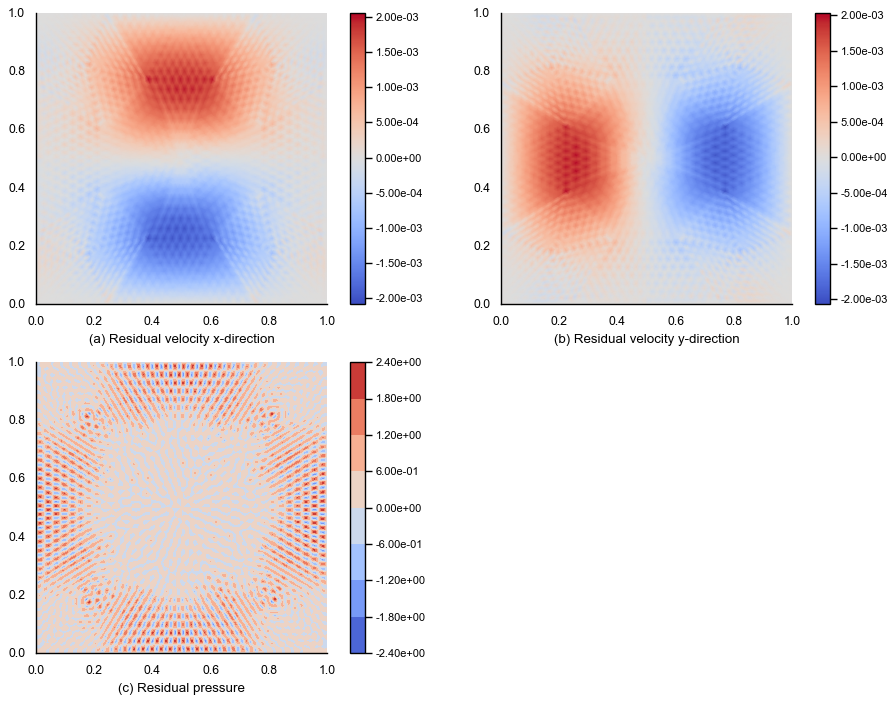

In [314]:
# Residual
set_sns()
save_name = f"residual_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_1_true[:lines_A].flatten() - uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              u_2_true[:lines_A].flatten() - uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')
p_residual = p_true[:lines_B].flatten() - p[:lines_B].flatten()
p_greater_0 = p_residual.copy()
p_greater_0[p_greater_0 < 0] = 0
p_lower_0 = p_residual.copy()
p_lower_0[p_lower_0 > 0] = 0
display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p_residual, 
                              nodal = True, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Residual velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Residual velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Residual pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

### Conclusions
- Possible to see the instabilities in the pressure solution, with the alternating positive and negative values. This fluctuations influences in the residuals patterns for the velocities as well.
- The residual for the stable solution p1-iso-p2 is all small and doesn't presents a different pattern than the higher values of the real solution.

## Computation of all methods

In [237]:
os.getcwd()

'C:\\Users\\kenjiuj\\OneDrive - Votorantim\\Docs\\KENJI URAZAKI JUNIOR\\UNIPD\\2 Semester\\NCMS\\Project code\\fem2d_stokesPDE'

In [238]:
i_list = [0, 1, 2, 3, 4]
type_list = ['linear', 'linear_gls', 'bubble', 'p1-iso-p2']
delta_list = [None, 0.001, 0.01, 0.1, 0.5, 1, 10]
c_list = [1, 10, 100]

In [239]:
df_residuals = pd.DataFrame()
for i in i_list:
    for tipo in type_list:
        for delta in delta_list:
            if delta != None and tipo != 'linear_gls':
                continue
            if delta == None and tipo == 'linear_gls':
                continue
            for c in c_list:
                try:
                    # Read data
                    coord = np.array(pd.read_csv(f'./Models/coord_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    triang_velocity = np.array(pd.read_csv(f'./Models/triangv_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    triang_pressure = np.array(pd.read_csv(f'./Models/triangp_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    uh = np.array(pd.read_csv(f'./Models/v_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    p =  np.array(pd.read_csv(f'./Models/p_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    u_1_true = np.array(pd.read_csv(f'./Models/v1sol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    u_2_true = np.array(pd.read_csv(f'./Models/v2sol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    p_true = np.array(pd.read_csv(f'./Models/psol_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))
                    h = np.array(pd.read_csv(f'./Models/h_i{i}_type{tipo}_c{c}_delta{delta}.csv', index_col = 0))

                    lines_A = np.max(np.array(triang_velocity.astype(int)))
                    lines_B = np.max(np.array(triang_pressure[:, :3].astype(int)))

                    u1_residual = uh[: lines_A,:] - u_1_true
                    u1_residual = [np.linalg.norm(u1_residual), 
                                   np.linalg.norm(u1_residual/lines_A),
                                   100 * np.linalg.norm(u1_residual) / lines_A / np.abs(np.min(u_1_true))]
                    u2_residual = uh[lines_A : 2 * lines_A,:] - u_2_true
                    u2_residual = [np.linalg.norm(u2_residual), 
                                   np.linalg.norm(u2_residual/lines_A),
                                   100 * np.linalg.norm(u2_residual) / lines_A / np.abs(np.min(u_2_true))]
                    p_residual = p[: lines_B,:] - p_true[: lines_B,:]
                    p_residual = [np.linalg.norm(p_residual), 
                                   np.linalg.norm(p_residual/lines_A),
                                   100 * np.linalg.norm(p_residual) / lines_A / np.abs(np.min(p_true))]

                    df_residuals = pd.concat([df_residuals,
                                              pd.DataFrame.from_dict({'i' : i, 
                                              'type' : tipo,
                                              'delta' : delta,
                                              'c' : c,
                                              'h_min' : np.min(h),
                                              'h_max' : np.max(h),
                                              'u1_residual' : [u1_residual],
                                              'u2_residual' : [u2_residual], 
                                              'p_residual' : [p_residual]})]
                                            )
                except:
                    print(i)
                    print(tipo)
                    continue

4
bubble
4
bubble
4
p1-iso-p2
4
p1-iso-p2
4
p1-iso-p2


# Conclusions
- The solution using mesh "4" for bubble and p1-iso-p2 was not possible due to memory reasons. After not possible to run the simulation locally, it was tried to run the code in the Colab PRO environment, but the memory needed was not sufficient in the workspace as well

In [240]:
# Set delta None as zero
df_residuals.loc[df_residuals['delta'].isna(), 'delta'] = 0

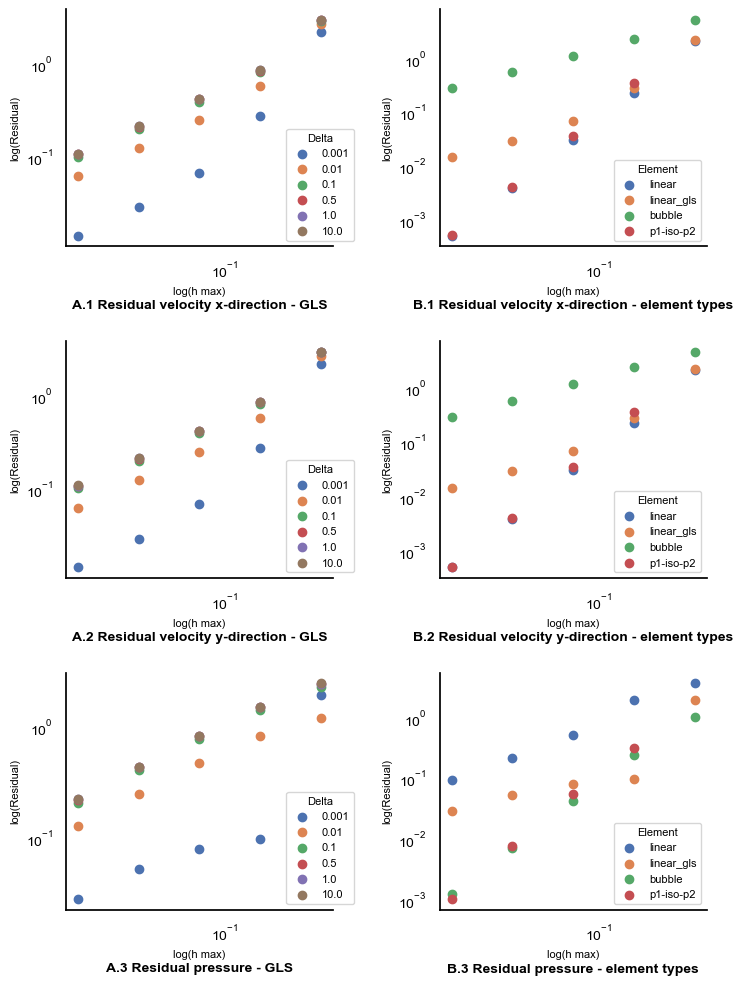

In [318]:
# Residuals GLS and all types - Use C = 1
plt.rcdefaults()
set_sns()
fig, axs = plt.subplots(3,2, figsize=(8.27, 11.69))
deltas = list(df_residuals['delta'].unique())
deltas.remove(0)

data = df_residuals[df_residuals['type'] == 'linear_gls']
variables = ['u1', 'u2', 'p']
for i, var in enumerate(variables):
    for d in deltas:
        # Filter data for each type
        data = df_residuals[(df_residuals['delta'] == d)&(df_residuals['c'] == 1)]
        # Plot each type with a different color
        axs[i, 0].scatter(data['h_max'], data[f'{var}_residual'].apply(lambda a: a[2]), label=d)
    legend = axs[i, 0].legend(bbox_to_anchor = (1.1, 0), loc='lower right', fontsize = 8)
    legend.set_title("Delta", prop={'size': 8})
    axs[i, 0].set_yscale('log')
    axs[i, 0].set_xscale('log')
    axs[i, 0].set_xlabel('log(h max)', fontsize = 8)
    axs[i, 0].set_ylabel('log(Residual)', fontsize = 8)
    axs[i, 0].tick_params(axis='both', which='major', labelsize=10)

types = ["linear", "linear_gls", "bubble", "p1-iso-p2"]
variables = ['u1', 'u2', 'p']
chosen_delta = 0.001
for i, var in enumerate(variables):
    for t in types:
        # Filter data for each type
        data = df_residuals[(df_residuals['type'] == t)&(df_residuals['c'] == 1)]
        if t == 'linear_gls':
            data = data[data['delta'] == chosen_delta]
        # Plot each type with a different color
        axs[i, 1].scatter(data['h_max'], data[f'{var}_residual'].apply(lambda a: a[2]), label=t)
    legend = axs[i, 1].legend(loc='lower right', fontsize = 8)
    legend.set_title("Element", prop={'size': 8})
    axs[i, 1].set_yscale('log')
    axs[i, 1].set_xscale('log')
    axs[i, 1].set_xlabel('log(h max)', fontsize = 8)
    axs[i, 1].set_ylabel('log(Residual)', fontsize = 8)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=10)


axs[0][0].text(0.5, -0.25, "A.1 Residual velocity x-direction - GLS", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[0][0].transAxes,
              weight = 'bold',
              fontsize = 10)

axs[1][0].text(0.5, -0.25, "A.2 Residual velocity y-direction - GLS", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[1][0].transAxes,
              weight = 'bold',
              fontsize = 10)

axs[2][0].text(0.5, -0.25, "A.3 Residual pressure - GLS", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[2][0].transAxes,
              weight = 'bold',
              fontsize = 10)

axs[0][1].text(0.5, -0.25, "B.1 Residual velocity x-direction - element types", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[0][1].transAxes,
              weight = 'bold',
              fontsize = 10)

axs[1][1].text(0.5, -0.25, "B.2 Residual velocity y-direction - element types", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[1][1].transAxes,
              weight = 'bold',
              fontsize = 10)

axs[2][1].text(0.5, -0.25, "B.3 Residual pressure - element types", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[2][1].transAxes,
              weight = 'bold',
              fontsize = 10)

fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

display_results.save_fig(f'methods_residuals')

### Conclusions
- Bubble didn't converge as well as the two other stabilization methods with the refining of the mesh. This can be related to the approximations in the integrals, as the bubble function has the highest degree o polynomial integration due to the basis function of the barycentric node.
- Good residuls for extremely low values of delta for the GLS stabilized method were attained, being the lowest one tested of 0.001 the one chosen for the stabilization. The higher residals for higher deltas are related to the variational crime commited when the GLS bilinear form is added in the system of equations, as this altesr the differential problem begin solved. It is possible to see that the rate of convergence is equal approximately equal for different deltas, differing only in the level of the residuals as discussed.

## C value influence

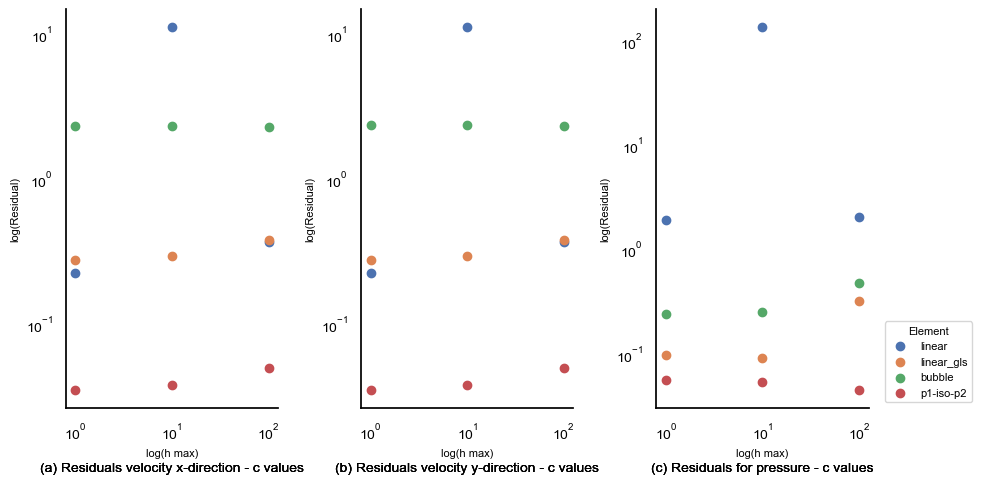

In [327]:
plt.rcdefaults()
set_sns()
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
types = ["linear", "linear_gls", "bubble", "p1-iso-p2"]
variables = ['u1', 'u2', 'p']
chosen_delta = 0.001
axs = axs.flatten()
for i, var in enumerate(variables):
    for t in types:
        # Filter data for each type
        data = df_residuals[(df_residuals['type'] == t)&(df_residuals['i'] == 1)]
        if t == 'linear_gls':
            data = data[data['delta'] == chosen_delta]
        # Plot each type with a different color
        axs[i].scatter(data['c'], data[f'{var}_residual'].apply(lambda a: a[2]), label=t)
    if i == 2:
        legend = axs[i].legend(bbox_to_anchor = (1.05, 0), loc='lower left', fontsize = 8)
        legend.set_title("Element", prop={'size': 8})
    axs[i].set_yscale('log')
    axs[i].set_xscale('log')
    axs[i].set_xlabel('log(h max)', fontsize = 8)
    axs[i].set_ylabel('log(Residual)', fontsize = 8)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    
    axs[0].text(0.5, -0.15, "(a) Residuals velocity x-direction - c values", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[0].transAxes,
              fontsize = 10)
    axs[1].text(0.5, -0.15, "(b) Residuals velocity y-direction - c values", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[1].transAxes,
              fontsize = 10)
    axs[2].text(0.5, -0.15, "(c) Residuals for pressure - c values", 
              horizontalalignment = 'center', 
              verticalalignment = 'center', 
              transform = axs[2].transAxes,
              fontsize = 10)
    #axs[3].set_visible(False)
    
    plt.tight_layout()
    
display_results.save_fig(f'c_residuals')

# Conclusions
- c value didn't have any difference in the solution for the problems.
- There is a problem in the convergion of the solution for the linear problem using the mesh "1" and c value of 10, but this could be easily solved by tuning the parameters of the GMRES solver. This was not pursues in the work as it was not apparently important for the discussions that this work focus on.

### Final chosen solution

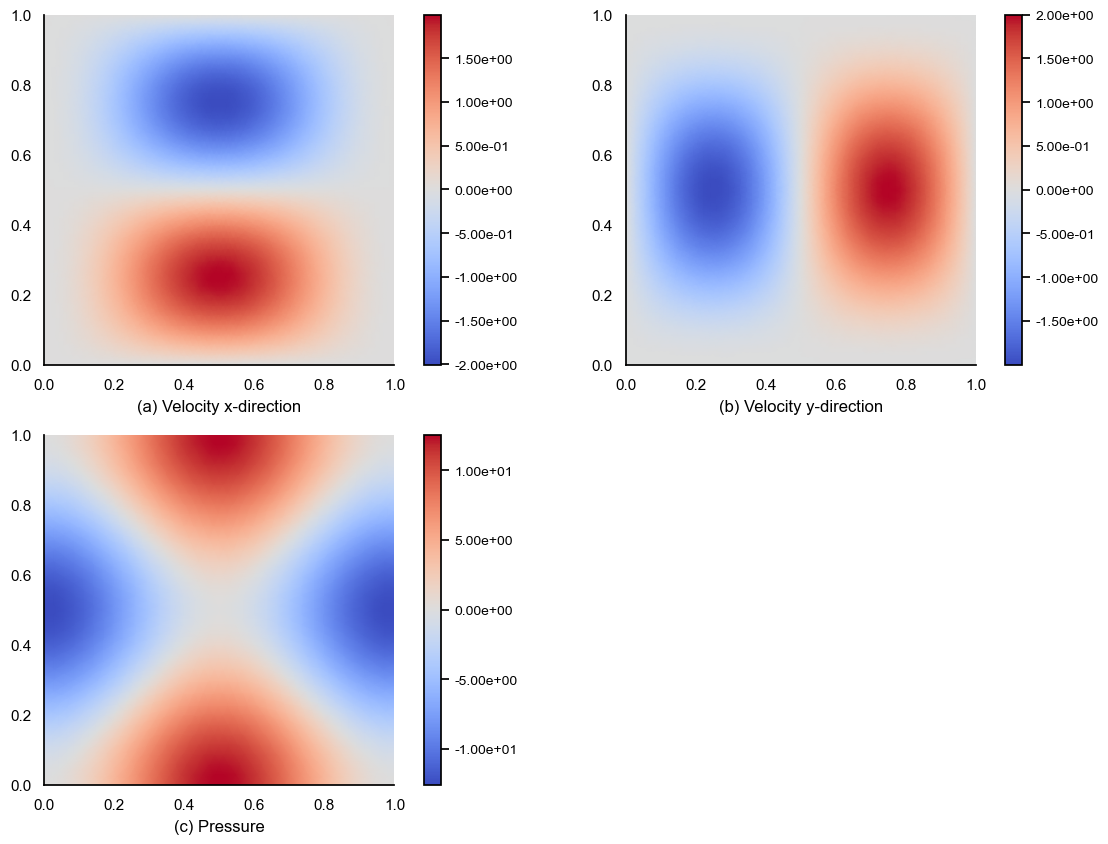

In [346]:
# True solution
i = '3'
tipo = 'p1-iso-p2'
delta = 'None'
c = 1

(coord, triang_velocity, triang_pressure, 
 uh, p, u_1_true, u_2_true, 
 p_true, lines_A, lines_B) = load_case(i = i, tipo = tipo, delta = delta, c = c)

set_sns()
save_name = f"sol_{i}{tipo}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

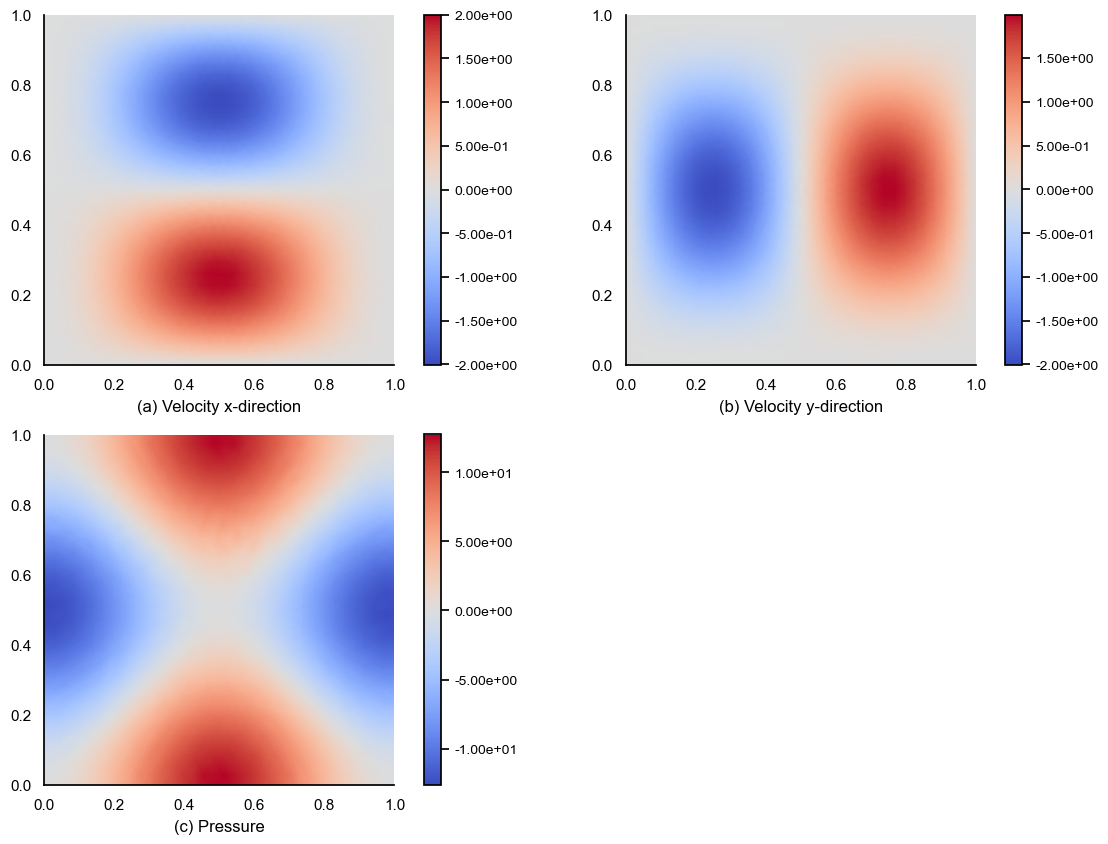

In [345]:
# True solution
i = '3'
tipo = 'bubble'
delta = None
c = 1

(coord, triang_velocity, triang_pressure, 
 uh, p, u_1_true, u_2_true, 
 p_true, lines_A, lines_B) = load_case(i = i, tipo = tipo, delta = delta, c = c)

set_sns()
save_name = f"sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

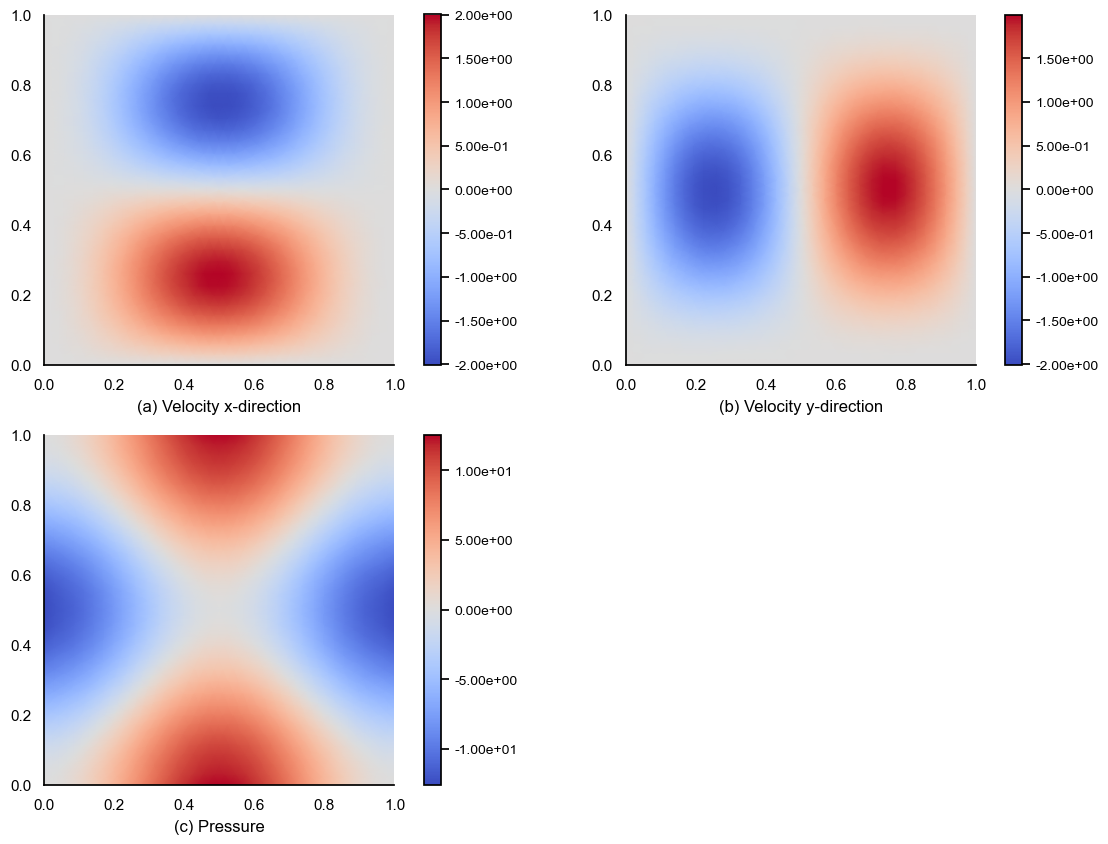

In [330]:
# True solution
i = '3'
tipo = 'linear_gls'
delta = 0.001
c = 1

(coord, triang_velocity, triang_pressure, 
 uh, p, u_1_true, u_2_true, 
 p_true, lines_A, lines_B) = load_case(i = i, tipo = tipo, delta = delta, c = c)

set_sns()
save_name = f"sol_{i}{type}{delta}{c}"
fig, ax = plt.subplots(2,2, figsize = [15, 10])
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[:lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,0],
                              cmap = 'coolwarm')
display_results.plot_field_2D(coord[:lines_A,:], 
                              triang_velocity[:, :3], 
                              uh[lines_A:2*lines_A].flatten(), 
                              nodal = False, 
                              ax = ax[0,1],
                              cmap = 'coolwarm')

display_results.plot_field_2D(coord[:lines_B,:], 
                              triang_pressure[:, :3], 
                              p[:lines_B].flatten(), 
                              nodal = False, 
                              ax = ax[1,0],
                              cmap = 'coolwarm')

plt.subplots_adjust(wspace= 0, hspace=0.2) 

ax[1][1].set_visible(False)
ax[0][0].text(0.5, -0.12, "(a) Velocity x-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][0].transAxes)
ax[0][1].text(0.5, -0.12, "(b) Velocity y-direction", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[0][1].transAxes)
ax[1][0].text(0.5, -0.12, "(c) Pressure", 
              horizontalalignment='center', 
              verticalalignment='center', 
              transform=ax[1][0].transAxes)

if save_name is not None:
    display_results.save_fig(f'{save_name}')

# Lid-driven cavity Problem

## Intro

Using the three stabilization schemes, the lid-driven cavity problem was solved for the mesh "3" as the mesh "4" demanded a computational memory not available in the moment. The residuals results for the system of equations and boundary conditions  are presented in the table ref{table: residuals_lid_driven}.

In [347]:
os.chdir('..')

In [348]:
os.chdir('./fem2d_lid_driven')

In [357]:
print(pd.read_csv('./Models/residuals.csv', index_col = 0)[['type', 'residual', 'residual_bc']].to_string(index = False))

      type     residual  residual_bc
linear_gls 6.076957e-12     6.612818
    bubble 4.278342e-12     6.515812
 p1-iso-p2 7.393102e-13     9.125729


In [245]:
i = '3'
tipo = 'p1-iso-p2'
delta = None

In [246]:
# load data
coord = np.array(pd.read_csv(f'./Models/coord_i{i}_type{tipo}_delta{delta}.csv', index_col = 0))
triang_velocity = np.array(pd.read_csv(f'./Models/triangv_i{i}_type{tipo}_delta{delta}.csv', index_col = 0))
triang_pressure = np.array(pd.read_csv(f'./Models/triangp_i{i}_type{tipo}_delta{delta}.csv', index_col = 0))
uh = np.array(pd.read_csv(f'./Models/v_i{i}_type{tipo}_delta{delta}.csv', index_col = 0))
p =  np.array(pd.read_csv(f'./Models/p_i{i}_type{tipo}_delta{delta}.csv', index_col = 0))
h = np.array(pd.read_csv(f'./Models/h_i{i}_type{tipo}_delta{delta}.csv', index_col = 0))

lines_A = np.max(np.array(triang_velocity.astype(int)))
lines_B = np.max(np.array(triang_pressure[:, :3].astype(int)))

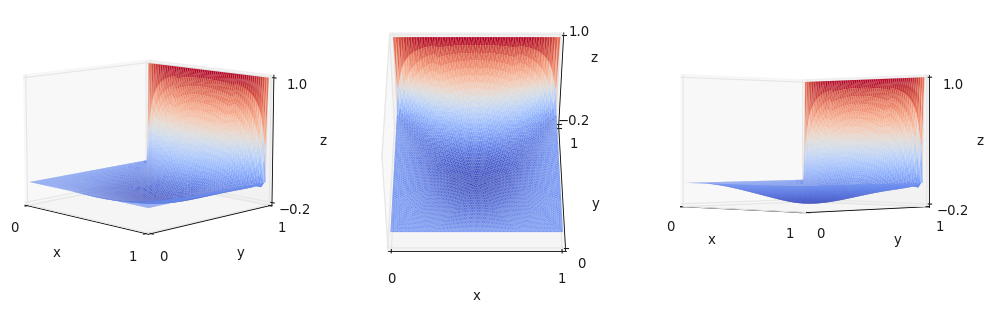

In [247]:
display_results.plot_field_3D(coord, 
            triang_velocity[:,:3],
            uh[:lines_A].flatten(),
            color_map = True)

display_results.save_fig(f'v_x_liddriven')

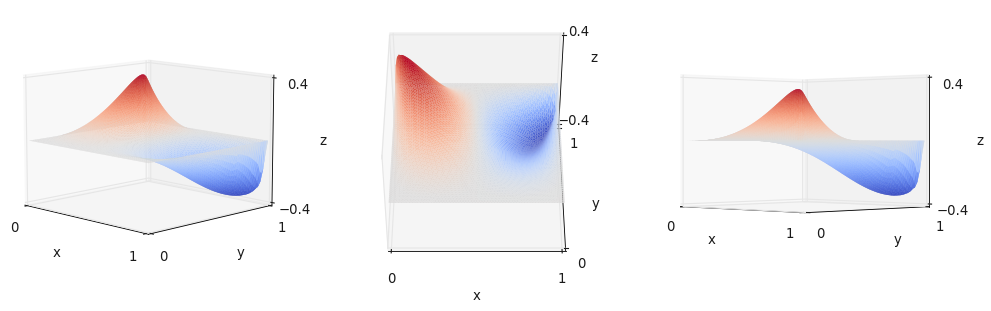

In [248]:
display_results.plot_field_3D(coord, 
            triang_velocity[:,:3],
            uh[lines_A:2 * lines_A].flatten(),
            color_map = True)

display_results.save_fig(f'v_y_lidriven')

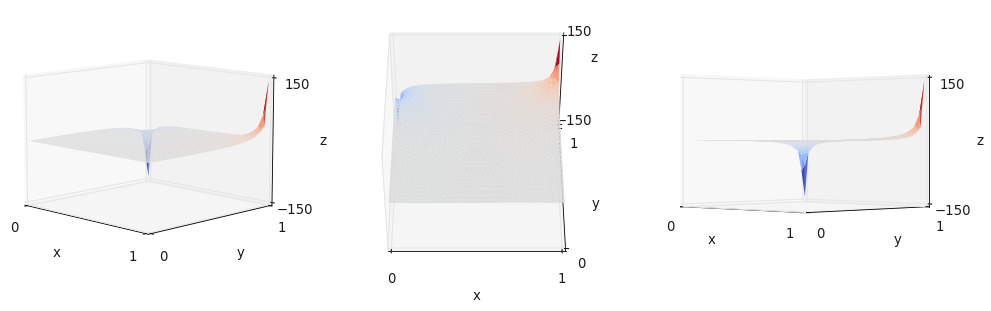

In [249]:
display_results.plot_field_3D(coord, 
            triang_pressure[:,:3],
            p.flatten(),
            color_map = True)

display_results.save_fig(f'p_liddriven')

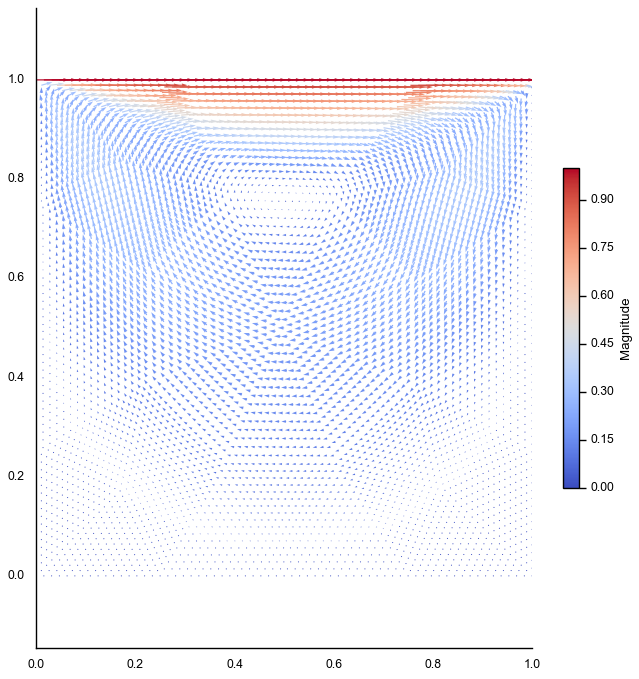

In [250]:
set_sns()
plt.figure(figsize = (10, 10))

magnitude = np.sqrt(uh[:lines_A]**2 + uh[lines_A:2 * lines_A]**2)

# quiver plot
Q = plt.quiver(coord[:, 0], coord[:, 1], 
               uh[:lines_A], 
               uh[lines_A:2 * lines_A], 
               magnitude, 
               cmap = 'coolwarm', 
               scale = 15)

# Add colorbar
plt.colorbar(Q, label='Magnitude', shrink=0.5)

# x and y limit
plt.xlim(0, 1)
plt.ylim(0, 1)

# Display the plot
plt.axis('equal')

display_results.save_fig(f'velocities_profiles_lidrive')

## Conclusion
- The bubble scheme performed the lowest boundary conditions residual, but as discussed for the solution of the extended stokes PDE had its limitations for the integration approximation in this work. The P1-iso-P2 element performed better for total residual for the system of equations, probably because of the higher number of degrees of freedom, and because of the previously discussions was selected as the most probable solution for the problem. Linear element with GLS stabilization performed close to the residuals of the previous ones, but it is clear of the effect of the added numerical diffusion in the problem as the velocity and pressure fields were more distant from the bubble and P1-iso-P2. In general, all methods were sucessfull to solve the lid-driven cavity problem.